<a href="https://colab.research.google.com/github/analyst-ahsan/Python-Projects/blob/main/EDA_%2B_ML_Models_Customer_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Prediction

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#### Data Exploration

In [5]:
df = pd.read_csv('/content/customer_purchase_data.csv')

In [6]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [8]:
df.shape

(1500, 9)

In [9]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [10]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [11]:
df.duplicated().sum()

112

#### Data Cleaning

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

#### Data Visuals

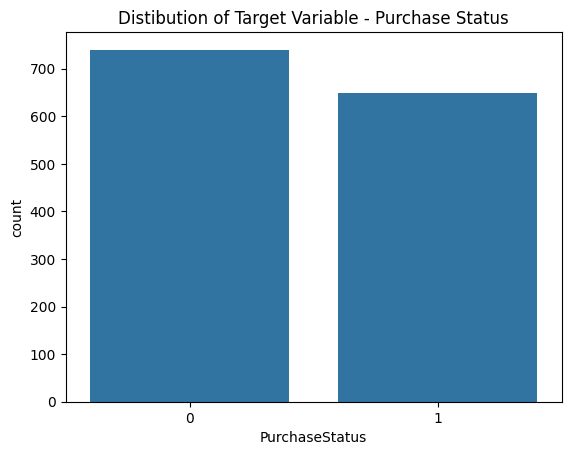

In [14]:
sns.countplot(data = df, x = df['PurchaseStatus'])
plt.title('Distibution of Target Variable - Purchase Status')
plt.show()

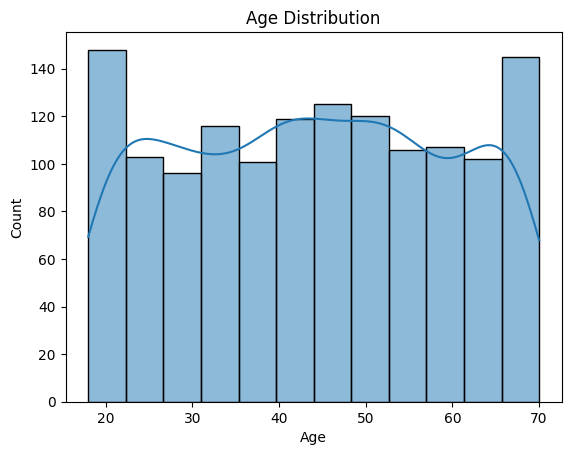

In [15]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

<ipython-input-16-6d8024438401>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Female' if label == 1 else 'Male' for label in df['Gender'].unique()])


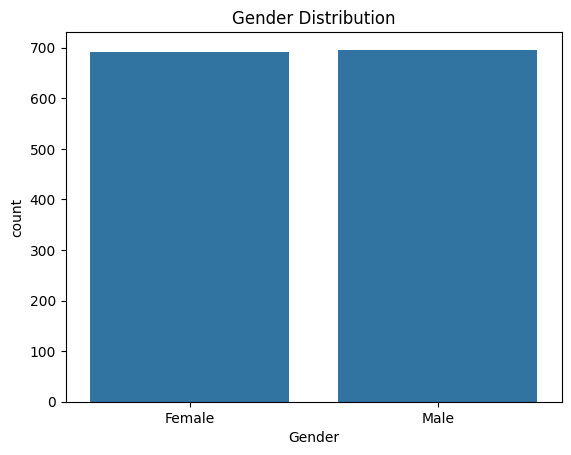

In [16]:
ax = sns.countplot(data=df , x='Gender')
ax.set_xticklabels(['Female' if label == 1 else 'Male' for label in df['Gender'].unique()])
plt.title('Gender Distribution')
plt.show()

<ipython-input-17-c9717c5fd68f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([label_map[label] for label in df['ProductCategory'].unique()])


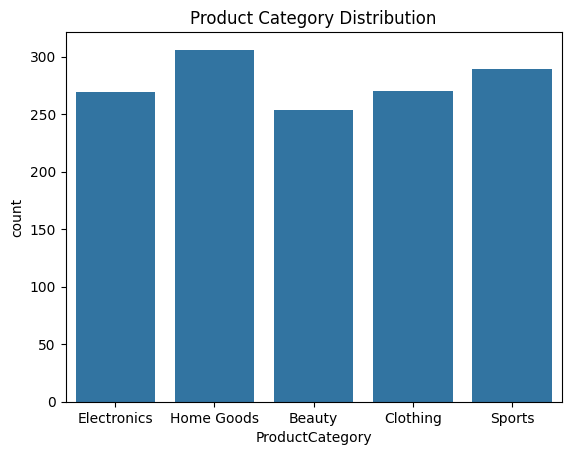

In [17]:
ax = sns.countplot(x='ProductCategory', data=df)
label_map = {0: 'Electronics', 1: 'Clothing', 2: 'Home Goods', 3: 'Beauty', 4: 'Sports'}
ax.set_xticklabels([label_map[label] for label in df['ProductCategory'].unique()])
plt.title('Product Category Distribution')
plt.show()

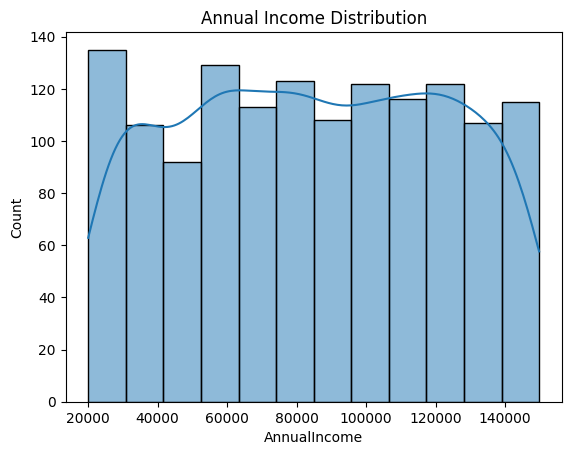

In [18]:
sns.histplot(df['AnnualIncome'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

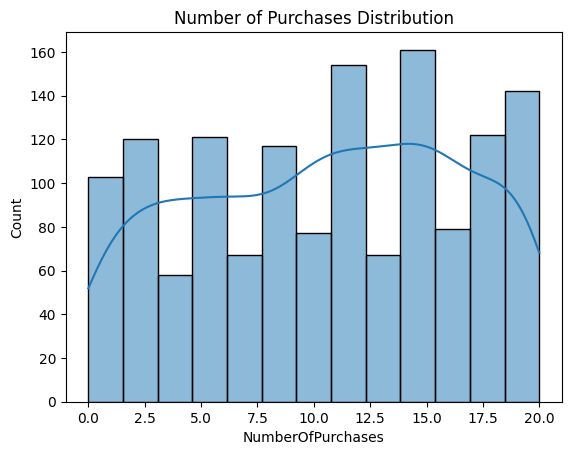

In [19]:
sns.histplot(df['NumberOfPurchases'], kde=True)
plt.title('Number of Purchases Distribution')
plt.show()

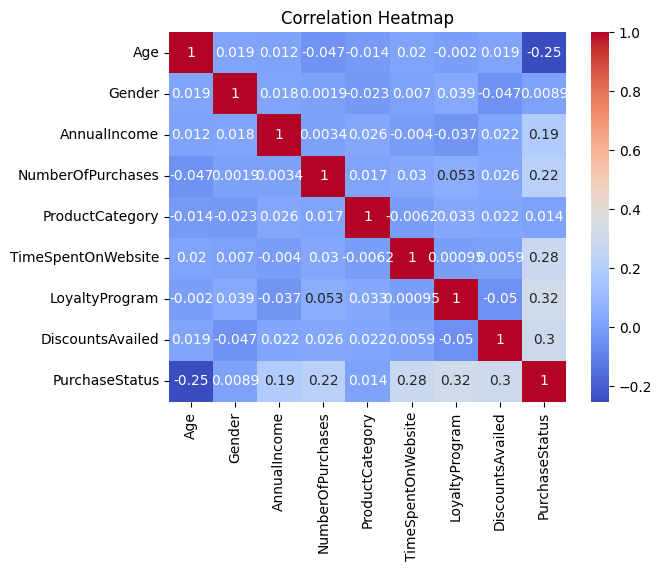

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Data Pre-Processing

In [21]:
X = df.drop('PurchaseStatus', axis=1)
y = df['PurchaseStatus']

In [22]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
# Splitting into test and train
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#### ML Models

##### Logisitic Regression

In [24]:
log_model = LogisticRegression(random_state=42)
log_model.fit(x_train, y_train)
y_pred_log = log_model.predict(x_test)


accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log)
cm_log = confusion_matrix(y_test, y_pred_log)

Logistic Regression:
 Accuracy: 0.8525179856115108
 Precision: 0.84375
 Recall: 0.8372093023255814
 F1 Score: 0.8404669260700389


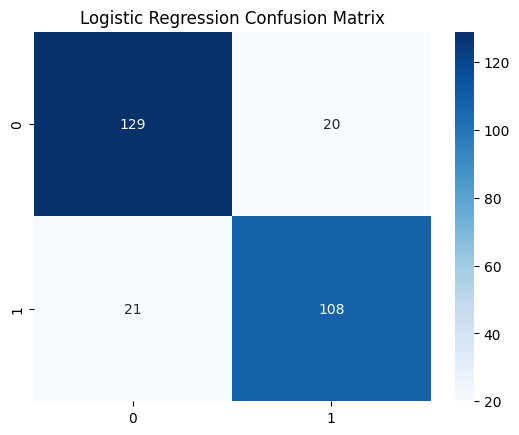

In [25]:
print(f'Logistic Regression:\n Accuracy: {accuracy_log}\n Precision: {precision_log}\n Recall: {recall_log}\n F1 Score: {f1_log}')
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

##### Suppor Vector Machine

In [26]:
svm_model = SVC(random_state=42)
svm_model.fit(x_train, y_train)
y_pred_svm = svm_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

Support Vector Machine:
 Accuracy: 0.8525179856115108
 Precision: 0.8333333333333334
 Recall: 0.8527131782945736
 F1 Score: 0.842911877394636


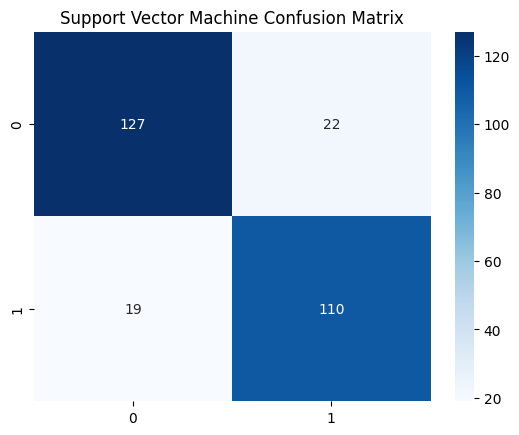

In [27]:
print(f'Support Vector Machine:\n Accuracy: {accuracy_svm}\n Precision: {precision_svm}\n Recall: {recall_svm}\n F1 Score: {f1_svm}')
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()

##### Random Forest

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
cm_rf = confusion_matrix(y_test, y_pred_rf)

Random Forest:
 Accuracy: 0.935251798561151
 Precision: 0.9512195121951219
 Recall: 0.9069767441860465
 F1 Score: 0.9285714285714286


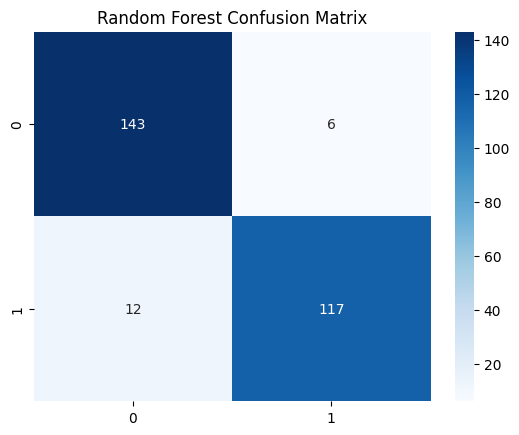

In [29]:
print(f'Random Forest:\n Accuracy: {accuracy_rf}\n Precision: {precision_rf}\n Recall: {recall_rf}\n F1 Score: {f1_rf}')
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()